# Tutorial_09:  Decision Trees and Random Forests （决策树和随机森林）

In [12]:
%matplotlib inline

## 1. 决策树

例子1： ![dt_1](images/dt_1.jpg)

**top-down, greedy search from root to leaf**

例子2：“你答我猜”的游戏：不断根据问题过滤候选答案，直到游戏结束（leaf）

** 怎样问最合适的问题？**

例子3：

 主演  |   类型   |  卖座
-------| ---------- | --------
汤姆·克鲁斯    | 动作 | Y
汤姆·克鲁斯   | 奇幻 | Y
汤姆·克鲁斯   | 爱情 | N
汤姆·克鲁斯    | 动作 | Y 
艾玛·罗伯茨    | 动作 | N
艾玛·罗伯茨    | 奇幻 | N
艾玛·罗伯茨    | 爱情 | Y

![dt_2](images/dt_2.jpg)

**判据1： entropy & information gain**

问完问题后，系统越确定越好(剩余的熵越小越好)

$$S_{\rm root} = -(4/7)\ln(4/7) - (3/7)\ln(3/7) = 0.68$$

分类决策1：

$$ \begin{align}S_L &= -0.75\ln0.75-0.25\ln0.25=0.56\\
S_R&=-(1/3)\ln(1/3) -(2/3)\ln(2/3) = 0.63 
\end{align}$$

$$S^\prime= (4/7)S_L + (3/7)S_R = 0.59,\qquad IG=0.68 - 0.59 = 0.09$$


分类决策2：

$$\begin{align}
S_L&=-(1/3)\ln(1/3) -(2/3)\ln(2/3) = 0.63 \\
S_M&=-(1/2)\ln(1/2) -(1/2)\ln(1/2) = 0.69 \\
S_R&=-(1/2)\ln(1/2) -(1/2)\ln(1/2) = 0.69 \\
\end{align}$$

$$S^\prime = (3/7)S_L + (2/7)S_M + (2/7)S_R = 0.66,\qquad IG=0.68 - 0.66 = 0.02$$

**判据2： Gini Index**

问完问题后，误判的概率越小越好

$${\rm Gini}= \sum_ip_i(1-p_i) = 1-\sum_i p_i^2$$

$${\rm Gini} = 1 - (4/7)^2 - (3/7)^2 = 0.49$$

分类决策1：
$$ \begin{align}
{\rm Gini}_L &= 1-(3/4)^2 - (1/4)^2\\
{\rm Gini}_R&= 1- (1/3)^2 - (2/3)^2
\end{align}$$

$${\rm Gini}^\prime = (4/7){\rm Gini}_L + (3/7){\rm Gini}_R = 0.43$$


 Metrics  |   pros & cons  
----------| ---------- 
entropy   | pros：数学更严格正式，cons: 计算相对复杂
Gini   | pros：计算更简便，cons: 对于非二叉树，结果一般没有entropy好


** 一个例子 **

![iris](images/iris.jpg)

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)
print(iris.target.shape)
print(np.bincount(iris.target))
iris_df.head(5)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150L, 4L)
(150L,)
[50 50 50]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8, random_state=1)
clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

clf.score(x_test, y_test)


C:\Users\Lenovo\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.96666666666666667

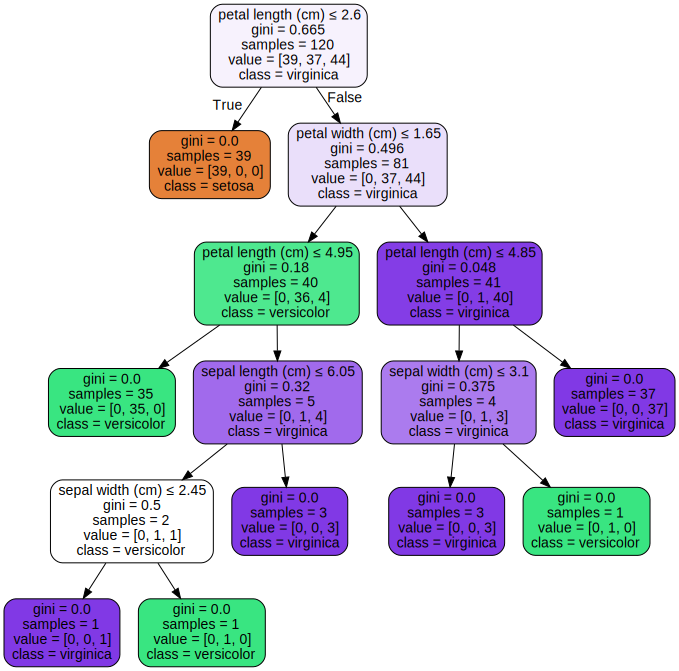

In [3]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)
graph

In [24]:
clf?

** 超参数 **
- max_depth, min_samples_split 等 （避免overfitting）
- pruning 越浅的tree越好，越小的tree越好 “奥卡姆剃刀”

**决策树方法优缺点**
 
 - pros:
    - no preprocessing
    - invariant to scaling
    - flexible datatype (numrical or categrical, classification or regression)
    - always available, good or not good
    - interpretable
 - cons:
    - not accuracy
    - not stable, prone to overfitting
    
** 其他实际工程中可能遇到的问题**

- favors attributes with many values over those with few values, because of "information gain". 不显著影响用户体验或工作效率的前提下，信息记录查可以尽量详细一点，有详细职业的问题，比仅区分白领、蓝领的问题信息量要大；但又不能太细，例如不能依据客户的出身年月日作为标准，否则由于每个leaf的成员太少，overfitting可能性很高


- if attribute missing, use major value, 也可概率性处理这个attribute但更复杂


- cost-factor，通过修改information gain的定义，来优先选择low cost 的attribute（如医疗问题中，血压、血糖、体温等指标，优选血压体温。如自动驾驶中优选传感采集时间快的指标）

## 2. Random Forests

DT 不稳定，因此采用“系综”(ensemble)方法 stablize 结果。可以简单理解为，很多tree投票，取大多数tree支持的结果

![vote](images/vote.jpg)


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8, random_state=1)


rf = RandomForestClassifier(n_estimators=200)
parameters = {'max_depth':[5, 7, 9]}

clf_grid = GridSearchCV(rf, parameters, n_jobs=-1)
clf_grid.fit(x_train, y_train)
print(clf_grid.best_params_)

{'max_depth': 5}


In [30]:
clf_grid.score(x_train, y_train)

1.0

In [31]:
clf_grid.score(x_test, y_test)

0.96666666666666667